# CS 4662 Project - Gender Classification 👨 👩

## Team Members:
- Brandon Gonzalez
- Mark Kalaiji
- Joaquin Robles

In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# reading the .csv and seeing its size
gender_df = pd.read_csv('attributes.csv')
gender_df.shape

(20259, 42)

In [3]:
# seeing what features the columns provide
gender_df.head()

,Unnamed: 0,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,50733,050734.jpg,-1,-1,1,-1,-1,1,1,-1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
1,88879,088880.jpg,-1,-1,1,-1,-1,-1,-1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1
2,137280,137281.jpg,-1,-1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,1,-1,1,-1,-1,-1
3,119289,119290.jpg,-1,-1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,28943,028944.jpg,1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [4]:
# feature matrix and label vector
X = gender_df[['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']]
y = gender_df['Male']

In [5]:
# split data set into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Decision Tree

## Decision Tree Accuracy

In [6]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

gender_dt = DecisionTreeClassifier(random_state=2)

# training on training set
gender_dt.fit(X_train, y_train)

# testing on testing set
y_predict_dt = gender_dt.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, y_predict_dt)
print('Decision Tree Accuracy:', accuracy_dt*100,'%')

Decision Tree Accuracy: 91.24712076340901 %


## Decision Tree Area Under Curve

In [7]:
# predict probability of 'Male'
y_predict_prob_dt = gender_dt.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics

fpr_dt, tpr_dt, thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)

# auc
AUC_dt = metrics.auc(fpr_dt, tpr_dt)
print('AUC Decision Tree =',AUC_dt*100,'%')

AUC Decision Tree = 92.433627028966 %


## Decision Tree ROC Curve

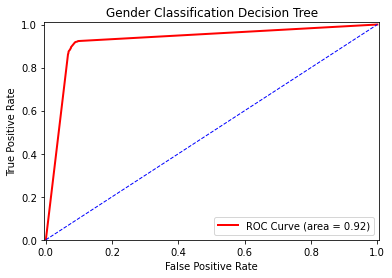

In [8]:
# plot roc curve
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_dt)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification Decision Tree')
plt.legend(loc="lower right")

plt.show()

# SVM

## SVM Accuracy

In [9]:
# SVM
from sklearn.svm import SVC

gender_svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

# training on training set
gender_svm.fit(X_train, y_train)

# testing on testing set
y_predict_svm = gender_svm.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy_svm = accuracy_score(y_test, y_predict_svm)
print('SVM Accuracy:', accuracy_svm*100,'%')

SVM Accuracy: 91.57617637380717 %


## SVM Area Under Curve

In [10]:
# predict probability of 'Male'
y_predict_prob_svm = gender_svm.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics

fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, y_predict_prob_svm[:,1], pos_label=1)

# auc
AUC_svm = metrics.auc(fpr_svm, tpr_svm)
print('AUC SVM =',AUC_svm*100,'%')

AUC SVM = 98.47416711505696 %


## SVM ROC Curve

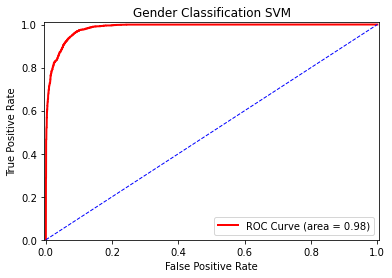

In [11]:
# plot roc curve
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_svm)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification SVM')
plt.legend(loc="lower right")

plt.show()

# Random Forest

### Random Forest Accuracy

In [12]:
from sklearn.ensemble import RandomForestClassifier

# gender_rf = RandomForestClassifier(n_estimators = 155, bootstrap = True, random_state=9)
gender_rf = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
# gender_rf = RandomForestClassifier(n_estimators = 1000, bootstrap = True, random_state=42)

# training on training set
gender_rf.fit(X_train, y_train)

# testing on testing set
y_predict_rf = gender_dt.predict(X_test)

# calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_test, y_predict_rf)
print('Random Forest Accuracy:', accuracy_rf*100,'%')

Random Forest Accuracy: 91.24712076340901 %


### Random Forest Area Under Curve

In [13]:
# predict probability of 'Male'
y_predict_prob_rf = gender_rf.predict_proba(X_test)

# get tpr and fpr for auc
from sklearn import metrics

fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

# auc
AUC_rf = metrics.auc(fpr_rf, tpr_rf)
print('AUC Random Forest =',AUC_rf*100,'%')

AUC Random Forest = 98.010385839835 %


### Random Forest ROC Curve

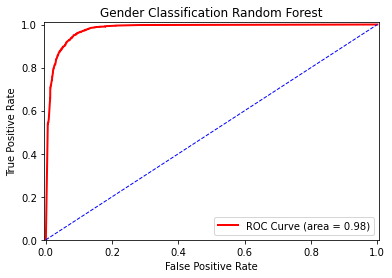

In [14]:
# plot roc curve
import matplotlib.pyplot as plt

# keep plot inside page
%matplotlib inline

plt.figure()

# roc curve
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_rf)

# random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# defining the range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# labels, title, legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gender Classification Random Forest')
plt.legend(loc="lower right")

plt.show()

In [15]:
# mark cnn